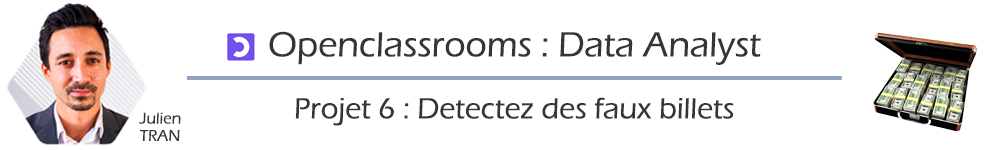

### Scénario :

Votre société de consulting informatique vous propose une nouvelle mission au ministère de l'Intérieur, dans le cadre de la lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. Votre mission si vous l'acceptez : créer un algorithme de détection de faux billets.

### Les données :

La PJ vous transmet un jeu de données contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :  

la longueur du billet (en mm) ;  
la hauteur du billet (mesurée sur le côté gauche, en mm) ;  
La hauteur du billet (mesurée sur le côté droit, en mm) ;  
la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;  
la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;  
la diagonale du billet (en mm).  

### Mission 0 : 

Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

### Sommaire // Mission 0 💶

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Valeurs manquantes, nulles et NA](#3)
* [4.Doublons](#4)
* [5.Outliers, valeurs abberantes et atypiques](#5)
* [6.Analyse descriptive, univariées, bivariées](#6)
    * [6.1.Analyses univariées](#6.1)
    * [6.2.Analyses bivariées](#6.1)
    * [6.3.Matrice de correlations](#6.1)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#install.packages('summarytools')
#install.packages('ggfortify')
#install.packages('ggplot2')
#install.packages('ggcorrplot')
#install.packages('broom')
#install.packages('pander')
#install.packages('fmsb')
#install.packages('repr')

In [2]:
#j'importe les librairies qui vont me servir plus tard

library(ggplot2)
library(ggfortify)
library(ggcorrplot)
library(summarytools)
library(broom)
library(pander)
library(fmsb)
library(repr)

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Warning message:
"package 'pander' was built under R version 3.6.3"Warning message:
"package 'fmsb' was built under R version 3.6.3"Warning message:
"package 'repr' was built under R version 3.6.3"

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [3]:
#notes2 <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', row.names=1, encoding="UTF-8")
notes <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', head = TRUE, encoding="UTF-8")

#j'ajoute une colonne num billet
#notes["num_billet"] <- seq(1,170)

head(notes)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,True,171.81,104.86,104.95,4.52,2.89,112.83
2,True,171.67,103.74,103.70,4.01,2.87,113.29
3,True,171.83,103.76,103.76,4.40,2.88,113.84
4,True,171.80,103.78,103.65,3.73,3.12,113.63
5,True,172.05,103.70,103.75,5.04,2.27,113.55
6,True,172.57,104.65,104.44,4.54,2.99,113.16


In [4]:
summarytools::descr(notes, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
diagonal,171.940588,0.3057684,171.04,171.73,171.945,172.14,173.01,0.296520,0.4075,0.001778338,0.19271833,0.1862377,0.49317584,170,100
height_left,104.066353,0.2981852,103.23,103.84,104.055,104.29,104.86,0.333585,0.4450,0.002865338,0.02814477,0.1862377,-0.51285353,170,100
height_right,103.928118,0.3309802,103.14,103.69,103.950,104.17,104.95,0.370650,0.4800,0.003184703,0.16591730,0.1862377,-0.07455263,170,100
length,112.570412,0.9244479,109.97,111.85,112.845,113.29,113.98,0.993342,1.4325,0.008212175,-0.64493845,0.1862377,-0.58189819,170,100
margin_low,4.612118,0.7021027,3.54,4.05,4.450,5.13,6.28,0.711648,1.0775,0.152229999,0.57457820,0.1862377,-0.78348577,170,100
margin_up,3.170412,0.2363614,2.27,3.01,3.170,3.33,3.68,0.237216,0.3175,0.074552260,-0.20072134,0.1862377,0.45709832,170,100


## 3.Recherche des valeurs manquantes, nulles et NA <a class="anchor" id="3"></a>

In [5]:
is.null(notes)

[1] FALSE

In [6]:
which(is.na(notes))

integer(0)

## 4.Doublons <a class="anchor" id="4"></a>

In [7]:
anyDuplicated(notes)

[1] 0

## 5.Outliers verification <a class="anchor" id="5"></a>

In [8]:
length(unique(notes$is_genuine))

[1] 2

In [9]:
head(notes[order(!notes$diagonal),])

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,True,171.81,104.86,104.95,4.52,2.89,112.83
2,True,171.67,103.74,103.70,4.01,2.87,113.29
3,True,171.83,103.76,103.76,4.40,2.88,113.84
4,True,171.80,103.78,103.65,3.73,3.12,113.63
5,True,172.05,103.70,103.75,5.04,2.27,113.55
6,True,172.57,104.65,104.44,4.54,2.99,113.16


## 6.Analyses descriptive, univariées et bivariées <a class="anchor" id="6"></a>

## 6.1.Analyses univariées <a class="anchor" id="6.1"></a>

In [10]:
notes_grouped <- aggregate(notes[, 1], list(notes$is_genuine), FUN = length)
notes_grouped

Group.1,x
<fct>,<int>
False,70
True,100


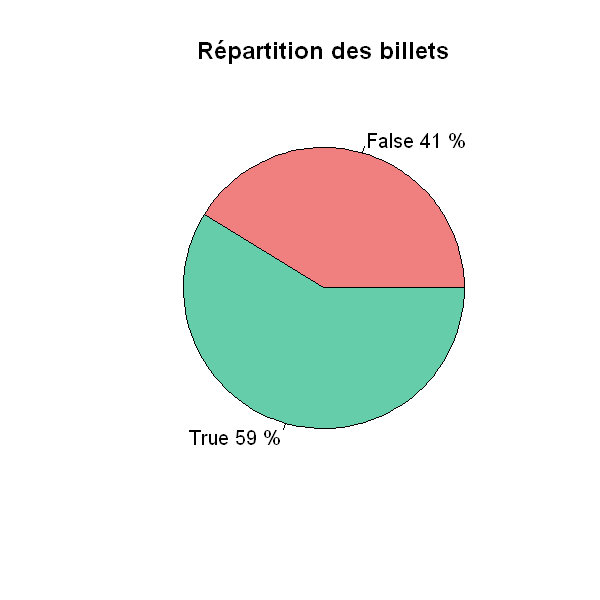

In [11]:
options(repr.plot.width=5, repr.plot.height=5)

X <- c("Faux billets", "Vrais billets")

# Calculate percentages
pct <- round(100*notes_grouped$x/sum(notes_grouped$x))

pie(notes_grouped$x,
    labels = paste(notes_grouped$Group.1, sep = " ", pct, "%"), 
    col = c("light coral", "medium aqua marine"),
    main = "Répartition des billets")

In [12]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [13]:
#je créé une fonction pour calculer le mode

estimate_mode <- function(x) {
  d <- density(x)
  d$x[which.max(d$y)]
}

In [14]:
summarytools::descr(notes$diagonal, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
diagonal,171.9406,0.3057684,171.04,171.73,171.945,172.14,173.01,0.29652,0.4075,0.001778338,0.1927183,0.1862377,0.4931758,170,100


[1] "Le mode est de 172.017491394572"

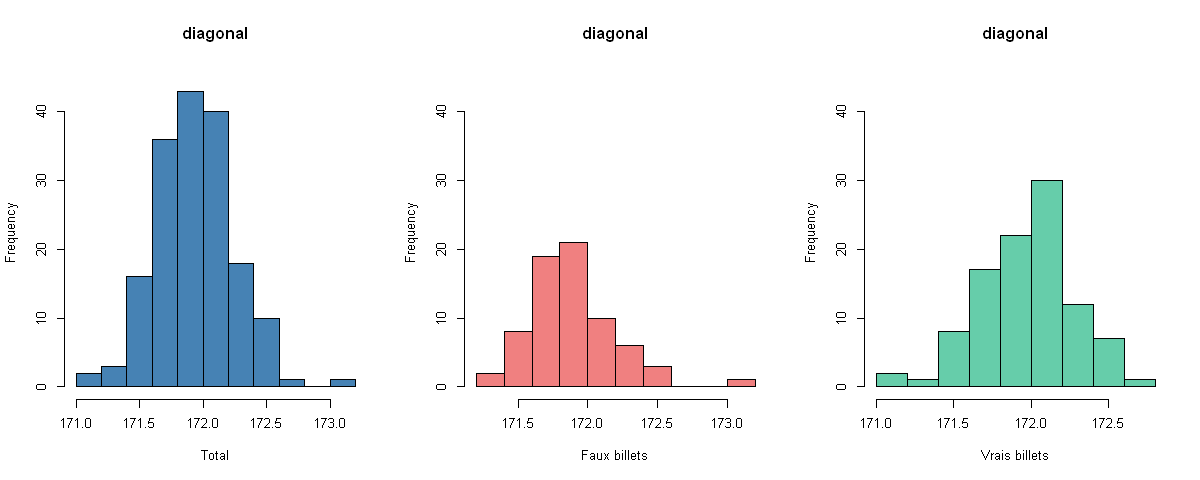

In [15]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(2)], main = "diagonal",ylim=c(0,45),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(2)], main = "diagonal",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(2)], main = "diagonal",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$diagonal)))

In [16]:
summarytools::descr(notes$height_left, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
height_left,104.0664,0.2981852,103.23,103.84,104.055,104.29,104.86,0.333585,0.445,0.002865338,0.02814477,0.1862377,-0.5128535,170,100


[1] "Le mode est de 103.943527470227"

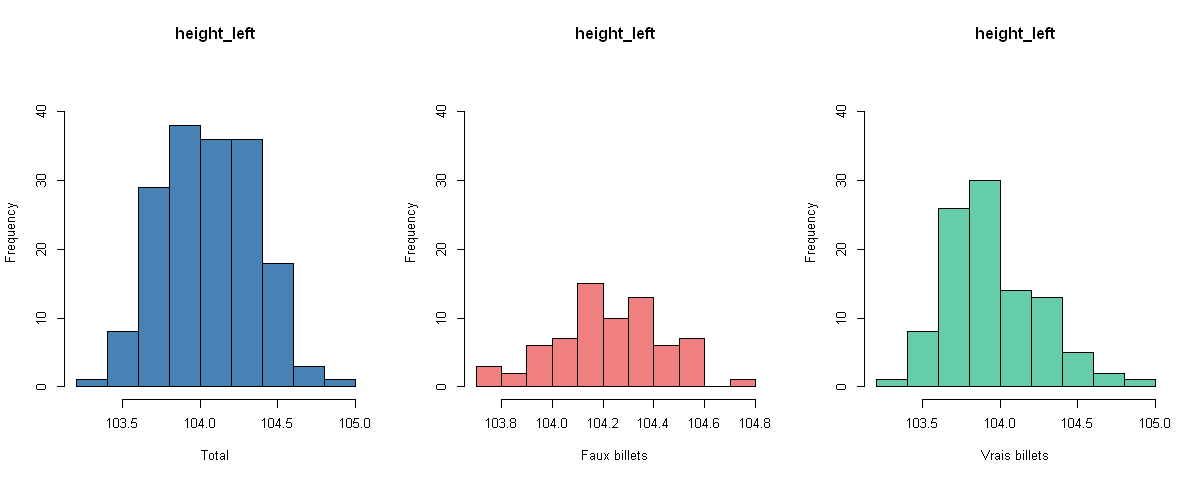

In [17]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(3)], main = "height_left",ylim=c(0,45),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(3)], main = "height_left",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(3)], main = "height_left",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$height_left)))

In [18]:
summarytools::descr(notes$height_right, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
height_right,103.9281,0.3309802,103.14,103.69,103.95,104.17,104.95,0.37065,0.48,0.003184703,0.1659173,0.1862377,-0.07455263,170,100


[1] "Le mode est de 104.013837002338"

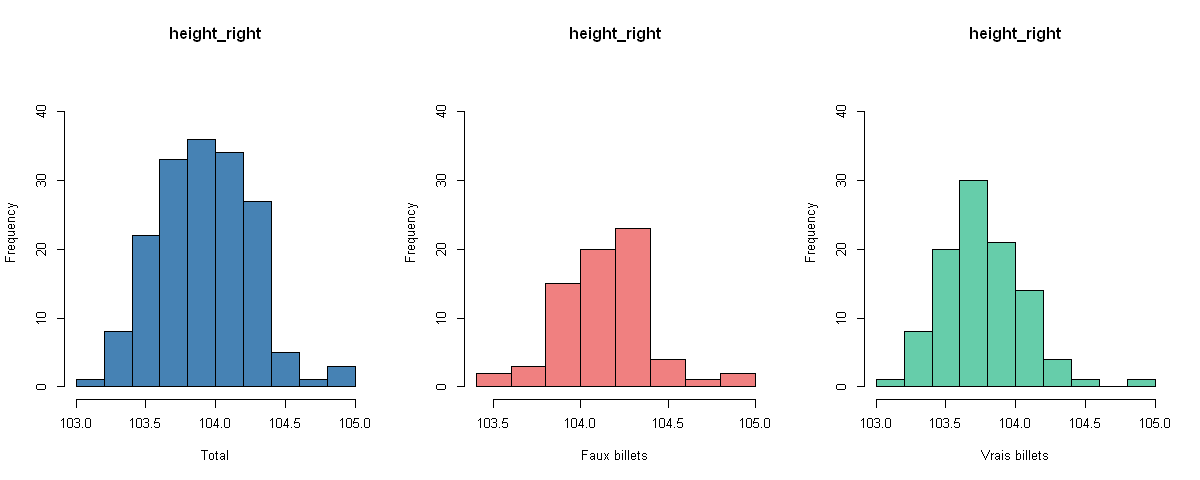

In [19]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(4)], main = "height_right",ylim=c(0,45),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(4)], main = "height_right",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(4)], main = "height_right",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$height_right)))

In [20]:
summarytools::descr(notes$margin_low, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
margin_low,4.612118,0.7021027,3.54,4.05,4.45,5.13,6.28,0.711648,1.0775,0.15223,0.5745782,0.1862377,-0.7834858,170,100


[1] "Le mode est de 4.12019001945048"

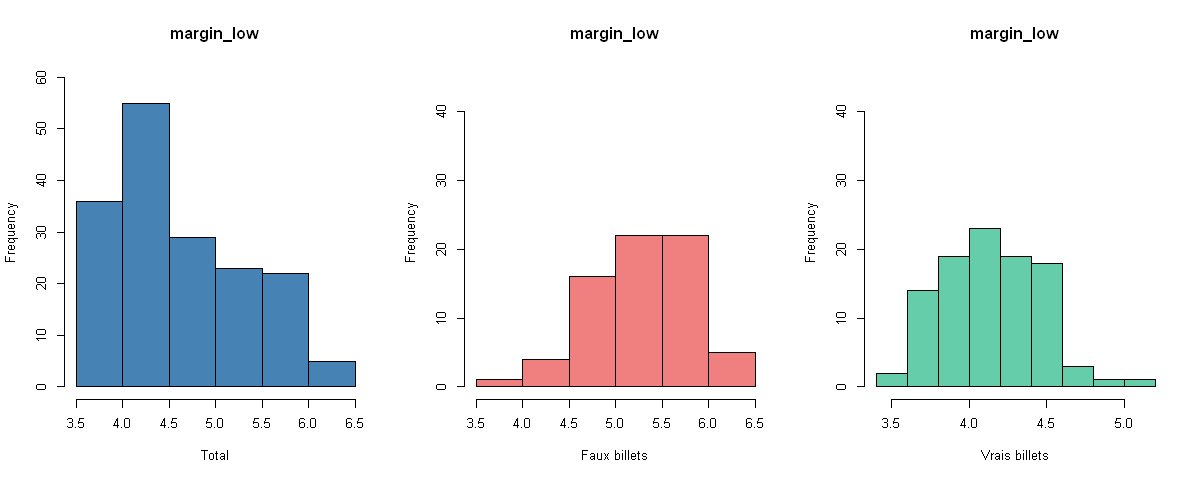

In [21]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(5)], main = "margin_low",ylim=c(0,60),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(5)], main = "margin_low",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(5)], main = "margin_low",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$margin_low)))

In [22]:
summarytools::descr(notes$margin_up, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
margin_up,3.170412,0.2363614,2.27,3.01,3.17,3.33,3.68,0.237216,0.3175,0.07455226,-0.2007213,0.1862377,0.4570983,170,100


[1] "Le mode est de 3.15585056438605"

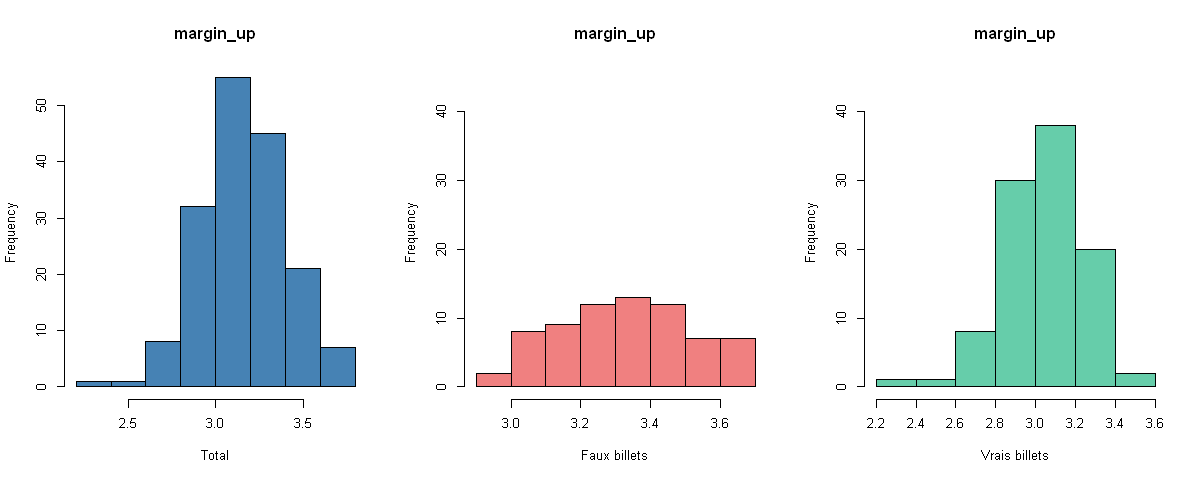

In [23]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(6)], main = "margin_up",ylim=c(0,55),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(6)], main = "margin_up",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(6)], main = "margin_up",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$margin_up)))

In [24]:
summarytools::descr(notes$length, transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
length,112.5704,0.9244479,109.97,111.85,112.845,113.29,113.98,0.993342,1.4325,0.008212175,-0.6449384,0.1862377,-0.5818982,170,100


[1] "Le mode est de 113.205923926623"

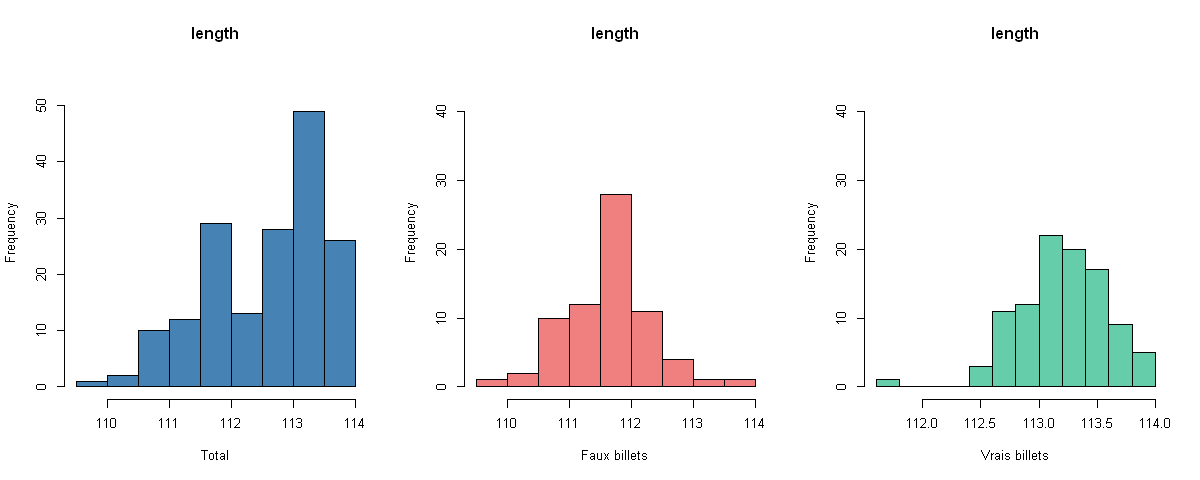

In [25]:
fig(10, 4)
par(mfrow=c(1,3))

hist(notes[,c(7)], main = "length",ylim=c(0,55),xlab='Total',col = "steel blue")
hist(notes[notes$is_genuine == "False",c(7)], main = "length",ylim=c(0,45),xlab='Faux billets',col = "light coral")
hist(notes[notes$is_genuine == "True",c(7)], main = "length",ylim=c(0,45),xlab='Vrais billets',col = "medium aqua marine")

sprintf(paste("Le mode est de", estimate_mode(notes$length)))

On remarque que dans l'ensemble les faux billets sont plus court que les vrais billets, on distingue cette différence sur diagonale, la hauteur gauche, la hauteur droite, la marge supérieure et la longueur.

## 6.2.Analyses bivariées <a class="anchor" id="6.2"></a>

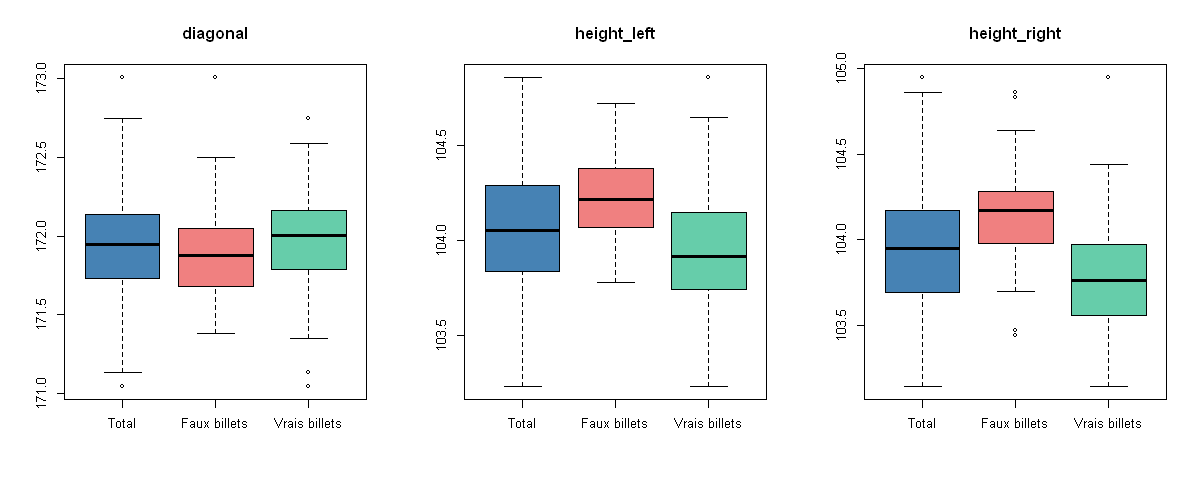

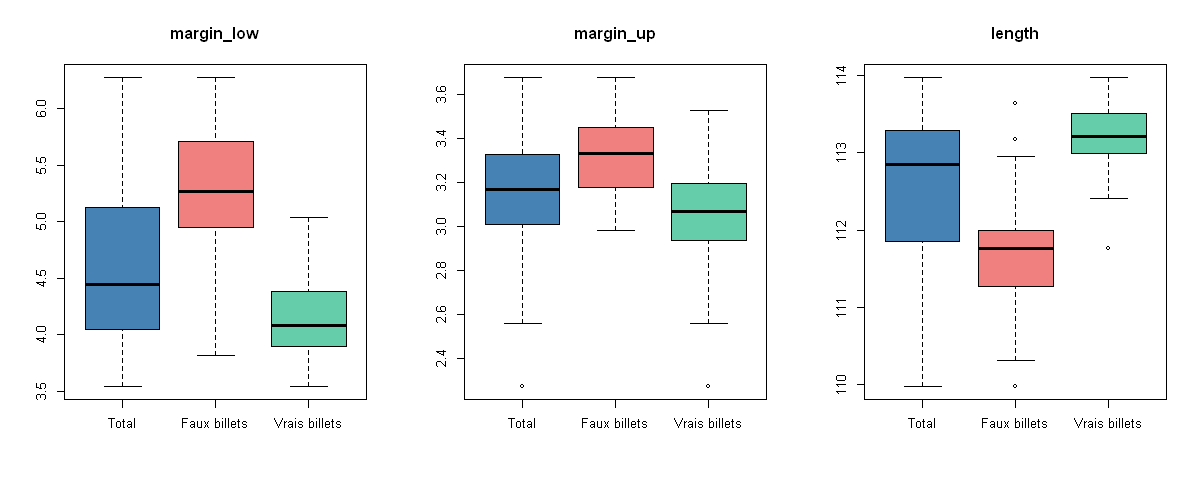

In [26]:
fig(10, 4)
par(mfrow=c(1,3))

boxplot(notes[,c(2)], notes[notes$is_genuine == "False",c(2)],notes[notes$is_genuine == "True",c(2)], main ='diagonal', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))
boxplot(notes[,c(3)], notes[notes$is_genuine == "False",c(3)],notes[notes$is_genuine == "True",c(3)], main ='height_left', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))
boxplot(notes[,c(4)], notes[notes$is_genuine == "False",c(4)],notes[notes$is_genuine == "True",c(4)], main ='height_right', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))
boxplot(notes[,c(5)], notes[notes$is_genuine == "False",c(5)],notes[notes$is_genuine == "True",c(5)], main ='margin_low', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))
boxplot(notes[,c(6)], notes[notes$is_genuine == "False",c(6)],notes[notes$is_genuine == "True",c(6)], main ='margin_up', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))
boxplot(notes[,c(7)], notes[notes$is_genuine == "False",c(7)],notes[notes$is_genuine == "True",c(7)], main ='length', names = c("Total","Faux billets", "Vrais billets"),col = c("steel blue","light coral","medium aqua marine"))

Deux variables marquent nettement une différence entre les faux billets et les vrais billets : la marge inférieure et la longueur.

In [27]:
notesx <- notes[,c(2,3,4,5,6,7)]
head(notesx)

,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,171.81,104.86,104.95,4.52,2.89,112.83
2,171.67,103.74,103.70,4.01,2.87,113.29
3,171.83,103.76,103.76,4.40,2.88,113.84
4,171.80,103.78,103.65,3.73,3.12,113.63
5,172.05,103.70,103.75,5.04,2.27,113.55
6,172.57,104.65,104.44,4.54,2.99,113.16


In [28]:
summarytools::descr(notes[notes$is_genuine == "False",c(2)], transpose = T)
summarytools::descr(notes[notes$is_genuine == "False",c(3)], transpose = T)
summarytools::descr(notes[notes$is_genuine == "False",c(4)], transpose = T)
summarytools::descr(notes[notes$is_genuine == "False",c(5)], transpose = T)
summarytools::descr(notes[notes$is_genuine == "False",c(6)], transpose = T)
summarytools::descr(notes[notes$is_genuine == "False",c(7)], transpose = T)

,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,171.8899,0.2974261,171.38,171.68,171.875,172.05,173.01,0.281694,0.365,0.00173033,0.8428637,0.2867505,1.492676,70,100


,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,104.2304,0.2131301,103.78,104.07,104.215,104.38,104.72,0.229803,0.295,0.002044798,-0.03337031,0.2867505,-0.5661168,70,100


,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,104.1456,0.2531519,103.44,103.98,104.17,104.28,104.86,0.207564,0.2975,0.002430751,-0.03714589,0.2867505,1.201291,70,100


,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,5.281571,0.5408465,3.82,4.95,5.265,5.71,6.28,0.570801,0.75,0.1024026,-0.40782,0.2867505,-0.2097883,70,100


,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,3.334571,0.1851023,2.98,3.18,3.335,3.45,3.68,0.192738,0.265,0.05551007,0.02884757,0.2867505,-0.9089535,70,100


,Mean,Std.Dev,Min,Q1,Median,Q3,Max,MAD,IQR,CV,Skewness,SE.Skewness,Kurtosis,N.Valid,Pct.Valid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
value,111.6607,0.6769311,109.97,111.27,111.765,112,113.64,0.541149,0.715,0.006062393,0.08873855,0.2867505,0.4014902,70,100


In [29]:
notesx_mean <- data.frame(
    row.names = c("All", "True", "False"),
      diagonal = c(171.9406, 171.9761, 171.8899),
      height_left = c(104.0664, 103.9515, 104.2304),
      height_right = c(103.9281, 103.7759, 104.1456),
      margin_low = c(4.612118, 4.1435, 5.281571),
      margin_up = c(3.170412, 3.0555, 3.334571),
      length = c(112.5704, 113.2072, 111.6607))
notesx_mean

,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All,171.9406,104.0664,103.9281,4.612118,3.170412,112.5704
True,171.9761,103.9515,103.7759,4.143500,3.055500,113.2072
False,171.8899,104.2304,104.1456,5.281571,3.334571,111.6607


In [30]:
#Definition de la portée des variables: maximum et minimum
max_min <- data.frame(
  diagonal = c(172, 171.8), height_left = c(104.3, 103.5), height_right = c(104.2, 103.5),
  margin_low = c(5.5, 4), margin_up = c(3.5, 3), length = c(113.3, 111)
)
rownames(max_min) <- c("Max", "Min")

In [31]:
#Paramétrage des max et min des variables dans df
df <- rbind(max_min, notesx_mean)
df

,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,172.0000,104.3000,104.2000,5.500000,3.500000,113.3000
Min,171.8000,103.5000,103.5000,4.000000,3.000000,111.0000
All,171.9406,104.0664,103.9281,4.612118,3.170412,112.5704
True,171.9761,103.9515,103.7759,4.143500,3.055500,113.2072
False,171.8899,104.2304,104.1456,5.281571,3.334571,111.6607


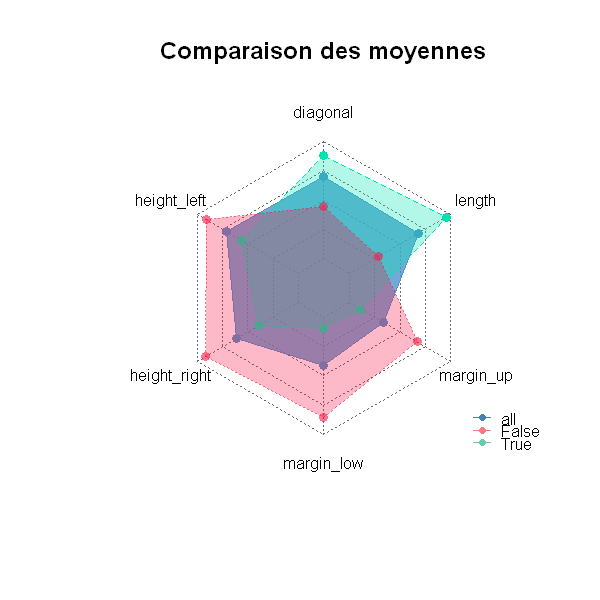

In [32]:
options(repr.plot.width=5, repr.plot.height=5)

    radarchart(df,
    axistype=0, 
    pcol=c(rgb(70/225,130/225,180/225),rgb(0/225,200/225,154/225),rgb(220/225,20/225,60/225,0.6)),
    pfcol=c(rgb(70/225,130/225,180/225,0.8),rgb(0/225,200/225,154/225,0.3),rgb(220/225,20/225,60/225,0.3)),
    plwd=1, 
    cglcol="dimgrey",
    cglty=3,
    axislabcol="dimgrey",
    cglwd=0.6,
    vlcex=0.8,
    title='Comparaison des moyennes')

legend(1,-0.8,
       legend=c("all","False","True"),
       pch=c(16),
       col=c("steelblue","lightcoral","medium aqua marine"),
       lty=5,cex=0.8,text.font=0.2,box.lty=0)

## 6.3.Matrice de correlations <a class="anchor" id="6.3"></a>

In [33]:
notesX <- notes
notes$is_genuine <- as.numeric(notes$is_genuine)

notes2 <- notes[,c(1,2,3,4,5,6,7)]
head(notes2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,171.81,104.86,104.95,4.52,2.89,112.83
2,2,171.67,103.74,103.70,4.01,2.87,113.29
3,2,171.83,103.76,103.76,4.40,2.88,113.84
4,2,171.80,103.78,103.65,3.73,3.12,113.63
5,2,172.05,103.70,103.75,5.04,2.27,113.55
6,2,172.57,104.65,104.44,4.54,2.99,113.16


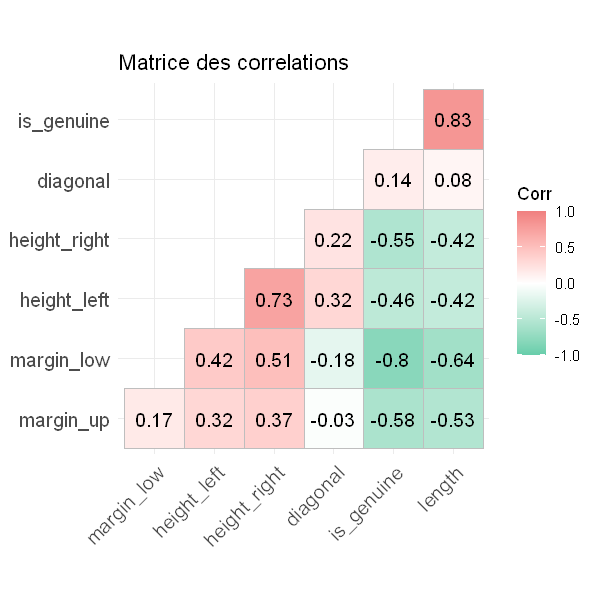

In [34]:
options(repr.plot.width=5, repr.plot.height=5)

ggcorrplot(corr = cor(notes2), hc.order = TRUE, type = "lower",lab = TRUE, title = "Matrice des correlations",col=colorRampPalette(c("medium aqua marine","white","light coral"))(2.5))

Les correlations les plus marquées sont : 
- hauteur gauche vs hauteur droite (0,73)
- authenticité vs longueur (0,83)
- authenticité vs marge inférieure (-0,8)

on retrouve bien le constat établi à l'analyse bivariée des variables.